# Zadanie projektu

V tejto fáze sa od Vás očakáva:

**Základný opis dát spolu s ich charakteristikami (5b).**

Pre dosiahnutie plného počtu bodov uveďte

- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

**Párová analýza dát (5b).**

- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

**Formulácia a štatistické overenie hypotéz o dátach (2b).**

- Mali by ste sformulovať aspoň dve hypotézy o dátach, ktoré budú relevantné v kontexte zadanej predikčnej úlohy. Príkladom hypotézy v doméne (v závislosti od pridelenej dátovej sady) môže byť, napr. *pacienti s chorobou štítnej žľazy majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti bez danej choroby*.
- Vami sformulované hypotézy overte vhodne zvoleným štatistickým testom.

**Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze (4b).**

Identifikujte, čo a ako budete musieť v rámci predspracovania vyriešiť v ďalšej fáze, napr.:

- nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
- duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
- nejednotné formáty dát
- chýbajúce hodnoty
- vychýlené (odľahlé) hodnoty
- v dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

**V odovzdanej správe (`Jupyter Notebooku`) by ste tak mali vedieť zodpovedať na otázky**

- Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
- Sú niektoré atribúty medzi sebou závislé? Od ktorých (jednotlivých) atribútov závisí predikovaná premenná?
- Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
- Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
- Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

> Správa sa odovzdáva v 6. týždni semestra na cvičení. Dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku). Následne správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 01.11.2020 23:59.

In [ ]:
import matplotlib.pyplot as plt
import pylab as py
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from numpy import mean
from numpy import var
from math import sqrt
from numpy import cov
import re
import json

In [ ]:
personal_data = pd.read_csv("Dataset/personal_train.csv")
other_data = pd.read_csv("Dataset/other_train.csv")

## Základné informácie o datasetoch
Dataset personal_data:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 6
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset néma žiadne duplicitné či chýbajúce dáta**
* Dôležité štatistické atribúty:
*    * Vek(age)
*    * Pohlavie(sex)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Dataset personal_data:
* Veľkosť: 3983 záznamov
* Počet stĺpcov: 23
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())
* **Tento dataset obsahuje značné množstvo duplicitných či chýbajúcich dát**
* Dôležité štatistické atribúty:
*    * Krajina pôvodu(native-country)
*    * Rasa(race)
*    * Vzťahy(relationship)
*    * Priemerné O2 (mean_oxygen)
*    * Tehotenstvo (pregnant)

Vlastnosti štatistických atribútov uvedené nižšie (získané pomocou dataset\['atribute'\].describe())

Obsahom datasetu other_data je aj atribút medical_info ktorý obsahuje reťazec podobný formátu JSON s ďaľšími atribútmi ktoré môžu byť štatisticky doležité a preto bol tento reťazec extraktovaný a v spojení s atribútom name z datasetu other_data pridaný do samostatného datasetu medical_info_dataset. 

*Poznámka: Boli pridávané iba záznamy pre jedičné hodnoty atribútu name a s nenulovým atribútom medical_info*

Dataset medical_info_dataset:
* Veľkosť: 3927 záznamov
* Počet stĺpcov: 5
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

Všetky atribúty tohto datasetu sú štatisticky dôležité a ich vlastnosti sú uvedené nižsie (získané pomocou dataset\['atribute'\].describe())

Všetky vyššie spomenuté datasety sme spojili do jedného datasetu pre možnosť jednoduchšie pracovať so všetkými dôležitými dátami

Dataset usefull_dataset:
* Veľkosť: 3933 záznamov
* Počet stĺpcov: 29
* Typy stĺpcov sú uvedené nižsie(získané pomocou dataset.info())

In [ ]:
if 'Unnamed: 0' in personal_data:
    del personal_data['Unnamed: 0']
if 'Unnamed: 0' in other_data:
    del other_data['Unnamed: 0']

In [ ]:
personal_data.head()

In [ ]:
personal_data.describe(include='all')

In [ ]:
personal_data.info()

In [ ]:
personal_data['age'].describe()

In [ ]:
personal_data['sex'].describe()

In [ ]:
other_data.head()

In [ ]:
other_data.describe(include='all')

In [ ]:
other_data.info()

In [ ]:
other_data['native-country'].describe()

In [ ]:
other_data['race'].describe()

In [ ]:
other_data['relationship'].describe()

In [ ]:
other_data['mean_oxygen'].describe()

In [ ]:
other_data['pregnant'].describe()

In [ ]:
# Create subset with only unique names
unique_names_dataset = other_data.drop_duplicates('name')
unique_names_dataset.head()

In [ ]:
# create a dataset from 'medical_info' attribute
medical_data_objects = []
for index, record in unique_names_dataset.iterrows():
    if isinstance(record['medical_info'], float):
        continue
    medical_object = json.loads(record['medical_info'].replace("\'", '\"').replace(':\"',':').replace('\",',',').replace('\"}','}'))
    medical_object['name'] = record['name']
    medical_data_objects.append(medical_object)
medical_info_dataset = pd.DataFrame(medical_data_objects)
medical_info_dataset.describe()

In [ ]:
medical_info_dataset.info()

In [ ]:
sns.distplot(medical_info_dataset[(medical_info_dataset['mean_glucose'] > 0) & (medical_info_dataset['mean_glucose'] < 300)].mean_glucose)

In [ ]:
# names in personal_data and unique_names_dataset are equal on equal positions
personal_data['name'].isin(unique_names_dataset['name']).value_counts()

In [ ]:
# merge datasets to create single large dataset with usefull data so it's easier to create graphs and analysis
merged_medical_info_dataset = unique_names_dataset.merge(medical_info_dataset, on=['name'], how='outer').drop('medical_info', axis='columns')
usefull_dataset = personal_data.merge(merged_medical_info_dataset, on=['name', 'address'], how='outer')
usefull_dataset.info()

### Distribúcia veku podľa pohlavia

In [ ]:
# create two subsets for records of Male and Female age
male_age = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['age'] > 0)]
female_age = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['age'] > 0)]

In [ ]:
# compare distribution of age of male and female dataset
sns.distplot(male_age['age'])
sns.distplot(female_age['age'])
usefull_dataset[usefull_dataset['age'] > 0].groupby(['sex'])['age'].describe()

In [ ]:
# test whether male and female datasets are from distributions of equal variances
age_sex_levene_test = stats.levene(male_age['age'], female_age['age'])
print(age_sex_levene_test)

# interpret
alpha = 0.05
if age_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

In [ ]:
# test whether male and female datasets are from equal distributions
age_sex_student_ttest, p = stats.ttest_ind(male_age['age'], female_age['age'])
print('Statistics=%.3f, p=%.3f' % (age_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

### Ditribúcia týždenných hodín podľa pohlavia

In [ ]:
female_hours = usefull_dataset[(usefull_dataset['sex'] == " Female") & (usefull_dataset['hours-per-week'] > 0)]
male_hours = usefull_dataset[(usefull_dataset['sex'] == " Male") & (usefull_dataset['hours-per-week'] > 0)]
sns.distplot(male_hours['hours-per-week'])
sns.distplot(female_hours['hours-per-week'])
usefull_dataset[usefull_dataset['hours-per-week'] > 0].groupby(['sex'])['hours-per-week'].describe()

In [ ]:
# test whether male and female datasets are from distributions of equal variances
hours_sex_levene_test = stats.levene(male_hours['hours-per-week'], female_hours['hours-per-week'])
print(hours_sex_levene_test)

# interpret
alpha = 0.05
if hours_sex_levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

In [ ]:
# test whether male and female datasets are from equal distributions
hours_sex_student_ttest, p = stats.ttest_ind(male_hours['hours-per-week'], female_age['hours-per-week'])
print('Statistics=%.3f, p=%.3f' % (hours_sex_student_ttest, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

## Identifikácia problémov s dátami v datasetoch

Medzi problemy s nevhodnou strukturou dat by som radil adresu ktora je cela ulozena ako string. Tieto data mohly byt ulozene ako json a dalo by sa s nimi lahsie pracovat. Napriklad keby chceme graf o udajoch podla statu musime si ich najpv vybrat zo stringu.

In [ ]:
column_one = personal_data['address'].str.split(', ',expand=True)[0]
column_two_and_three = personal_data['address'].str.split(', ',expand=True)[1]
column_two = column_two_and_three.str.split(' ',expand=True)[0]
column_three = column_two_and_three.str.split(' ',expand=True)[1]

personal_data['address'] = column_one
personal_data['state'] = column_two
personal_data['postal_code'] = column_three

sns.set_theme(style="darkgrid")
sns.displot(data=personal_data['state'].dropna(),aspect = 5)

dalsi problem s datami je ze medzi personal_data sa nachadzaju neplatne data ako napriklad osoba ktora ma -1 rokov

In [ ]:
personal_data.age.min()

Problem je aj s nekonzistenciov formatovania datumov kde hned prvy je inak formatovany ako ostatne
a to nehovoriac o tom ze kolonka vek nekoresponduje s datumom narodenia. jedine ze by tam boli aj datumy z historie ako napriklad rok narodenia 55

In [ ]:
personal_data[["date_of_birth","age"]]

Pri Medical_data su problemy s datamy trosku ine napriklad ma nulove hodnoty kde vsetky zaznamy su len z mien a adries inak kazda kategoria ma nejake null hodnoty

In [ ]:
other_data.info()

Dalsi problem s other_data je ze data pre medical info sa tvaria ze su JSON ale niesu koli tomu ze pouzivaju jednoite uvodzovky 

In [ ]:
other_data.medical_info[0]

takysto ako pri personal data tak aj pri other_data sa v datach nachadzaju nezmysli ako napriklad ze musi su tehotny

In [ ]:
other_data[other_data['pregnant'] == "t"]

medzi dalsie problemy datasetu other_data radim nazvy atributov ktore casto nemaju ziadny vyznam alebo je nedostacujuci na pochopenie o com hovori

celkovo v other_data sa nachadza vela Null hodnot ktore budeme naskor riesit tak ze patricny riadok budeme ignorovat s pouzitim Pairwise deletion toto budeme pouzivat aj pri neplatnych datach ktore boli opisovane vyssie

In [ ]:
usefull_dataset.describe()

In [ ]:
sns.pairplot(usefull_dataset[['race', 'std_oxygen', 'std_glucose', 'skewness_oxygen', 'skewness_glucose', 'kurtosis_oxygen', 'kurtosis_glucose', 'mean_oxygen', 'mean_glucose', 'native-country', 'class', 'age', 'hours-per-week', 'sex']], hue='sex')

## Nulova hypoteza ludia s odchylkou glukozy od priemeru maju vacsiu pravdepodobnost mat cukrovku
## Alternativna nulova hypoteza ludia s odchylkou glukozy od priemeru maju vacsiu pravdepodobnost mat cukrovku

### Overenie predpokladov
#### Predpoklad normálnosti rozdelenia
Na overenie normálnosti vieme použiť aj Shapiro-Wilkov test, ktorý testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia. Ak je  
p < 0,05, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je  p > 0,05, nulovú hypotézu nezamietame, 
teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

In [ ]:
class_data = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['skewness_glucose'] > 0)]['class']
skew_data = usefull_dataset[(usefull_dataset['class'] >= 0) & (usefull_dataset['skewness_glucose'] > 0)]['skewness_glucose']

In [ ]:
sns.distplot(class_data)

In [ ]:
sns.distplot(skew_data)

In [243]:
shapiro_test = stats.shapiro(class_data)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.6097676753997803, pvalue=0.0)
Another distributions (reject H0)


In [244]:
shapiro_test = stats.shapiro(skew_data)
print(shapiro_test)

# interpret
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.6159499287605286, pvalue=0.0)
Another distributions (reject H0)


#### Nakolko pvalue pri class_data a aj pri skewness_data je menej ako 0.05 musime pouzit Mann-Whitneyho U-test

## Mann-Whitney U test

Similar to T-test, but non-parametric for at least 20 observations in each data sample.

**Hypothesis**
- $H_0$ = no difference between the distributions of the data samples 
- **Fail to Reject $H_0$**: Sample distributions are equal 
- **Reject $H_0$**: Sample distributions are not equal

In [ ]:
# compare samples
stat, p = stats.mannwhitneyu(skew_data, class_data) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

## Statistical power

In [ ]:
# calculate cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2) 
    
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
    
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    
    # calculate the effect size
    d = (u1 - u2) / s 
    return d

cd = cohend(skew_data, class_data)
print('Cohens d value: %f' % cd)
# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)

In [ ]:
# plotting
sns.distplot(class_data, bins=10)
sns.distplot(skew_data, bins=10)

# calculate covariance matrix
covariance = cov(skew_data, class_data)[0, 1]
print(covariance)

In [ ]:
df = pd.DataFrame({'observation': np.repeat([True, False], len(class_data)), 
                   'score': np.concatenate((skew_data, class_data))})
sns.boxplot('observation', 'score', data=df)

Podla vysledkov by malo byt jasne ze nasa hypoteza je pravdiva ale nemusi byt ochorenie az prilis zavysle od odchylky glukozy

## Parova analyza

### Analyza odchylky glukozy a odchylky kyslika

In [245]:

skew_oxy_ana = usefull_dataset['skewness_oxygen']
skew_glu_ana = usefull_dataset['skewness_glucose']
class_ana = usefull_dataset['class']

<AxesSubplot:xlabel='skewness_glucose', ylabel='skewness_oxygen'>

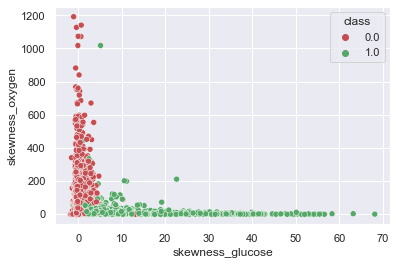

In [252]:
 sns.scatterplot(x=skew_glu_ana,y=skew_oxy_ana,hue=class_ana,palette=['r','g'])

pri parovom grafe odchylky glukozy a odchylky kyslika mozme vidiet ze pokial mal pacient odchylku jedneho nemal odchylky v druhom. Co moze znamenat ze od seba nejakt tieto daza zavysia ale moze to byt aj nahodou.

Pearson correlation: -0.312


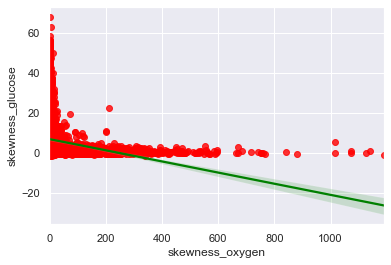

In [275]:
sns.regplot(x=skew_oxy_ana, y=skew_glu_ana,scatter_kws={"color": "red"}, line_kws={"color": "green"})
print("Pearson correlation: %.3f" % skew_oxy_ana.corr(skew_glu_ana))

Ked za pozrieme na koleraciu vidim e je negativna a jej absolutna hodnota nieje prave najvsysie co znamena ze je medzi tymito datami korelacia ale nieje az taka signifikantna

Cohens d value: 1.129405
Large effect - Cohens d value: 1.129405


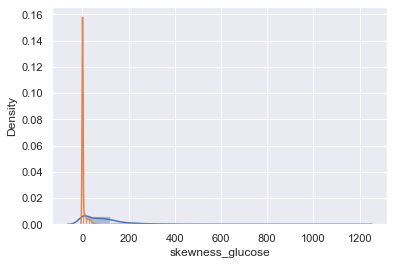

In [282]:
sns.distplot(skew_oxy_ana,bins=10)
sns.distplot(skew_glu_ana,bins=10)

cd = cohend(skew_oxy_ana, skew_glu_ana)
print('Cohens d value: %f' % cd)

# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)

<AxesSubplot:xlabel='skewness_glucose', ylabel='class'>

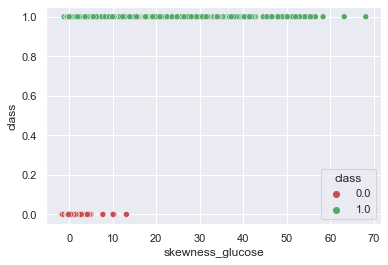

In [258]:
 sns.scatterplot(x=skew_glu_ana,y=class_ana,hue=class_ana,palette=['r','g'])

Pearson correlation: 0.682


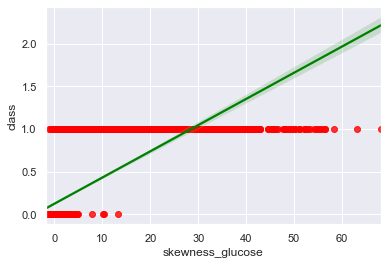

In [271]:
sns.regplot(x=skew_glu_ana, y=class_ana,scatter_kws={"color": "red"}, line_kws={"color": "green"})
print("Pearson correlation: %.3f" % class_ana.corr(skew_glu_ana))

Cohens d value: 0.578969
Medium effect - Cohens d value: 0.578969


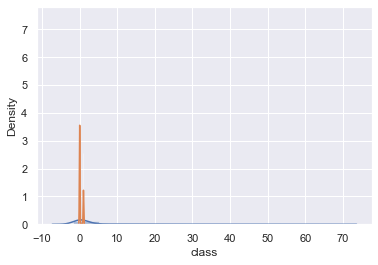

In [278]:
sns.distplot(skew_glu_ana,bins=10)
sns.distplot(class_ana,bins=10)

cd = cohend(skew_glu_ana, class_ana)
print('Cohens d value: %f' % cd)

# interpret
if 0.2 <= cd < 0.5:
    print('Small effect - Cohens d value: %f' % cd)
elif 0.5 <= cd < 0.8:
    print('Medium effect - Cohens d value: %f' % cd)
elif 0.8 <= cd:
    print('Large effect - Cohens d value: %f' % cd)